In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: seaborn in c:\users\zhossai3\appdata\local\programs\python\python312\lib\site-packages (0.13.2)




[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

ADULT DATA

In [179]:
adult_data = pd.read_csv(r"C:\Users\zhossai3\Desktop\My code\OT+Fairness\Data\adult\adult_original.csv")

In [156]:
adult_missing_percentage = adult_data.isnull().sum().sum() / (adult_data.shape[0] * adult_data.shape[1]) * 100

print(f"Total percentage of missing values: {adult_missing_percentage:.2f}%")

Total percentage of missing values: 0.30%


In [131]:
print(adult_data.shape)

(48842, 15)


In [132]:
print(adult_data.head())

   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             0             0             

In [133]:
print(adult_data.describe)

<bound method NDFrame.describe of        age         workclass  fnlwgt  education  education-num  \
0       39         State-gov   77516  Bachelors             13   
1       50  Self-emp-not-inc   83311  Bachelors             13   
2       38           Private  215646    HS-grad              9   
3       53           Private  234721       11th              7   
4       28           Private  338409  Bachelors             13   
...    ...               ...     ...        ...            ...   
48837   39           Private  215419  Bachelors             13   
48838   64               NaN  321403    HS-grad              9   
48839   38           Private  374983  Bachelors             13   
48840   44           Private   83891  Bachelors             13   
48841   35      Self-emp-inc  182148  Bachelors             13   

           marital-status         occupation    relationship  \
0           Never-married       Adm-clerical   Not-in-family   
1      Married-civ-spouse    Exec-managerial 

In [134]:
print(adult_data.isnull().sum())

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64


In [135]:
print(adult_data['native-country'].unique())

['United-States' 'Cuba' 'Jamaica' 'India' '?' 'Mexico' 'South'
 'Puerto-Rico' 'Honduras' 'England' 'Canada' 'Germany' 'Iran'
 'Philippines' 'Italy' 'Poland' 'Columbia' 'Cambodia' 'Thailand' 'Ecuador'
 'Laos' 'Taiwan' 'Haiti' 'Portugal' 'Dominican-Republic' 'El-Salvador'
 'France' 'Guatemala' 'China' 'Japan' 'Yugoslavia' 'Peru'
 'Outlying-US(Guam-USVI-etc)' 'Scotland' 'Trinadad&Tobago' 'Greece'
 'Nicaragua' 'Vietnam' 'Hong' 'Ireland' 'Hungary' 'Holand-Netherlands' nan]


In [136]:
# Drop the 'education' column
adult_data_modify = adult_data.drop(columns=['education'])


In [137]:
type(adult_data_modify)

pandas.core.frame.DataFrame

In [138]:

import numpy as np
adult_data_modify = adult_data_modify.replace('?', np.nan)
adult_data_modify = adult_data_modify.fillna(-1)



In [139]:
print(adult_data_modify.isnull().sum())  
print((adult_data_modify == '?').sum())  

age               0
workclass         0
fnlwgt            0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64
age               0
workclass         0
fnlwgt            0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


In [140]:
adult_data_modify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education-num   48842 non-null  int64 
 4   marital-status  48842 non-null  object
 5   occupation      48842 non-null  object
 6   relationship    48842 non-null  object
 7   race            48842 non-null  object
 8   sex             48842 non-null  object
 9   capital-gain    48842 non-null  int64 
 10  capital-loss    48842 non-null  int64 
 11  hours-per-week  48842 non-null  int64 
 12  native-country  48842 non-null  object
 13  income          48842 non-null  object
dtypes: int64(6), object(8)
memory usage: 5.2+ MB


In [141]:
print(adult_data_modify["workclass"].unique())
print(adult_data_modify["marital-status"].unique())
print(adult_data_modify["occupation"].unique())
print(adult_data_modify["relationship"].unique())
print(adult_data_modify["race"].unique())
print(adult_data_modify["sex"].unique())

['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' -1
 'Self-emp-inc' 'Without-pay' 'Never-worked']
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' -1 'Protective-serv'
 'Armed-Forces' 'Priv-house-serv']
['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']
['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']
['Male' 'Female']


In [142]:
relationship = {'Husband': 1, 'Wife': 1, 'Own-child': 2, 'Other-relative': 3,'Unmarried':4,'Not-in-family':4}
adult_data_modify['relationship'] = adult_data_modify['relationship'].map(relationship)


In [143]:
sex = {'Male': 1, 'Female': 2}
adult_data_modify['sex'] = adult_data_modify['sex'].map(sex)

In [144]:
race = {'White': 1, 'Black': 2, 'Asian-Pac-Islander': 2, 'Amer-Indian-Eskimo': 2,'Other':2}
adult_data_modify['race'] = adult_data_modify['race'].map(race)

In [145]:
workclass = {'State-gov': 1, 'Federal-gov': 1, 'Local-gov': 1, 'Private': 2,'Self-emp-inc':3,'Self-emp-not-inc':3,'Without-pay':4,'Never-worked':5,-1:-1}
adult_data_modify['workclass'] = adult_data_modify['workclass'].map(workclass)

In [146]:
maritalstatus = {'Married-civ-spouse': 1, 'Married-AF-spouse': 1, 'Married-spouse-absent': 1, 'Divorced': 2,'Separated':2,'Widowed':2,'Never-married':3}
adult_data_modify['marital-status'] = adult_data_modify['marital-status'].map(maritalstatus)

In [147]:
occupation = {'Adm-clerical': 1, 'Exec-managerial': 1, 'Prof-specialty': 1, 'Protective-serv': 3,'Priv-house-serv':3,'Other-service':3,'Sales':3,'Craft-repair':2,'Machine-op-inspct':2,'Transport-moving':2,'Farming-fishing':2,'Handlers-cleaners':2,'Tech-support':3,'Armed-Forces':3,-1:-1}
adult_data_modify['occupation'] = adult_data_modify['occupation'].map(occupation)

In [148]:
print(adult_data_modify['income'].unique())

['<=50K' '>50K' '<=50K.' '>50K.']


In [149]:
from sklearn.preprocessing import LabelEncoder

# Example for one column
label_encoder = LabelEncoder()
adult_data_modify['income'] = label_encoder.fit_transform(adult_data_modify['income'])


In [150]:
country_to_region = {
    'United-States': 'North America', 'Cuba': 'North America', 'Jamaica': 'Caribbean', 
    'India': 'Asia', 'Mexico': 'North America', 'South': -1, 'Puerto-Rico': 'North America', 
    'Honduras': 'North America', 'England': 'Europe', 'Canada': 'North America', 'Germany': 'Europe', 
    'Iran': 'Asia', 'Philippines': 'Asia', 'Italy': 'Europe', 'Poland': 'Europe', 
    'Columbia': 'South America', 'Cambodia': 'Asia', 'Thailand': 'Asia', 'Ecuador': 'South America', 
    'Laos': 'Asia', 'Taiwan': 'Asia', 'Haiti': 'Caribbean', 'Portugal': 'Europe', 
    'Dominican-Republic': 'North America', 'El-Salvador': 'North America', 'France': 'Europe', 
    'Guatemala': 'North America', 'China': 'Asia', 'Japan': 'Asia', 'Yugoslavia': 'Europe', 
    'Peru': 'South America', 'Outlying-US(Guam-USVI-etc)': 'North America', 'Scotland': 'Europe', 
    'Trinadad&Tobago': 'Caribbean', 'Greece': 'Europe', 'Nicaragua': 'North America', 
    'Vietnam': 'Asia', 'Hong': 'Asia', 'Ireland': 'Europe', 'Hungary': 'Europe', 
    'Holand-Netherlands': 'Europe', -1: -1
}

region_to_number = {
    'North America': 1,
    'South America': 2,
    'Europe': 3,
    'Asia': 4,
    'Caribbean': 5,
    -1 : -1
}

# Step 2: Replace the native-country column with continent numbers
adult_data_modify['native-country'] = (
    adult_data_modify['native-country']
    .map(country_to_region)   # Convert countries to regions
    .map(region_to_number)    # Convert regions to numeric codes
)

In [151]:
adult_data_modify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             48842 non-null  int64
 1   workclass       48842 non-null  int64
 2   fnlwgt          48842 non-null  int64
 3   education-num   48842 non-null  int64
 4   marital-status  48842 non-null  int64
 5   occupation      48842 non-null  int64
 6   relationship    48842 non-null  int64
 7   race            48842 non-null  int64
 8   sex             48842 non-null  int64
 9   capital-gain    48842 non-null  int64
 10  capital-loss    48842 non-null  int64
 11  hours-per-week  48842 non-null  int64
 12  native-country  48842 non-null  int64
 13  income          48842 non-null  int64
dtypes: int64(14)
memory usage: 5.2 MB


In [180]:
adult_data_modify.to_csv(r"C:\Users\zhossai3\Desktop\My code\OT+Fairness\Data\adult\adult_data_modify.csv", index=False)

In [181]:
adult_data_modify.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,1,77516,13,3,1,4,1,1,2174,0,40,1,0
1,50,3,83311,13,1,1,1,1,1,0,0,13,1,0
2,38,2,215646,9,2,2,4,1,1,0,0,40,1,0
3,53,2,234721,7,1,2,1,2,1,0,0,40,1,0
4,28,2,338409,13,1,1,1,2,2,0,0,40,1,0


Creating a new dataset which does not have any missing value coloumns

In [182]:
adult_data_without_missing_values = adult_data.drop(columns=['education'])


In [183]:
adult_data_without_missing_values = adult_data_without_missing_values.replace('?', pd.NA)

# Drop rows with NaN (which now include rows that had '?')
adult_data_without_missing_values = adult_data_without_missing_values.dropna()

# Reset the index for cleanliness
#adult_data_without_missing_values = adult_data_without_missing_values.reset_index(drop=True)

In [184]:
relationship = {'Husband': 1, 'Wife': 1, 'Own-child': 2, 'Other-relative': 3,'Unmarried':4,'Not-in-family':4}
adult_data_without_missing_values['relationship'] = adult_data_without_missing_values['relationship'].map(relationship)

sex = {'Male': 1, 'Female': 2}
adult_data_without_missing_values['sex'] = adult_data_without_missing_values['sex'].map(sex)

race = {'White': 1, 'Black': 2, 'Asian-Pac-Islander': 2, 'Amer-Indian-Eskimo': 2,'Other':2}
adult_data_without_missing_values['race'] = adult_data_without_missing_values['race'].map(race)

workclass = {'State-gov': 1, 'Federal-gov': 1, 'Local-gov': 1, 'Private': 2,'Self-emp-inc':3,'Self-emp-not-inc':3,'Without-pay':4,'Never-worked':5,-1:-1}
adult_data_without_missing_values['workclass'] = adult_data_without_missing_values['workclass'].map(workclass)

maritalstatus = {'Married-civ-spouse': 1, 'Married-AF-spouse': 1, 'Married-spouse-absent': 1, 'Divorced': 2,'Separated':2,'Widowed':2,'Never-married':3}
adult_data_without_missing_values['marital-status'] = adult_data_without_missing_values['marital-status'].map(maritalstatus)

occupation = {'Adm-clerical': 1, 'Exec-managerial': 1, 'Prof-specialty': 1, 'Protective-serv': 3,'Priv-house-serv':3,'Other-service':3,'Sales':3,'Craft-repair':2,'Machine-op-inspct':2,'Transport-moving':2,'Farming-fishing':2,'Handlers-cleaners':2,'Tech-support':3,'Armed-Forces':3,-1:-1}
adult_data_without_missing_values['occupation'] = adult_data_without_missing_values['occupation'].map(occupation)


# Example for one column
label_encoder = LabelEncoder()
adult_data_without_missing_values['income'] = label_encoder.fit_transform(adult_data_without_missing_values['income'])

adult_data_without_missing_values['native-country'] = (
    adult_data_without_missing_values['native-country']
    .map(country_to_region)   # Convert countries to regions
    .map(region_to_number)    # Convert regions to numeric codes
)



In [185]:
adult_data_without_missing_values.head(2)

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,1,77516,13,3,1,4,1,1,2174,0,40,1,0
1,50,3,83311,13,1,1,1,1,1,0,0,13,1,0


In [186]:
adult_data_without_missing_values.shape

(45222, 14)

In [187]:
adult_data_without_missing_values.to_csv(r"C:\Users\zhossai3\Desktop\My code\OT+Fairness\Data\adult\adult_data_without_missing_values.csv", index=False)

In [188]:
adult_data_without_missing_values.isnull().sum()

age               0
workclass         0
fnlwgt            0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

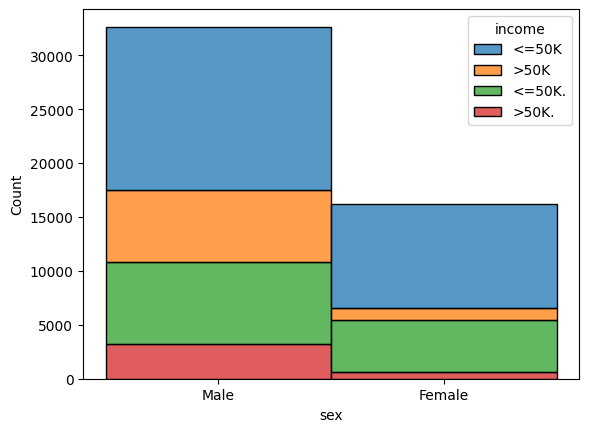

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(adult_data, x="sex", hue="income", multiple="stack")
plt.show()

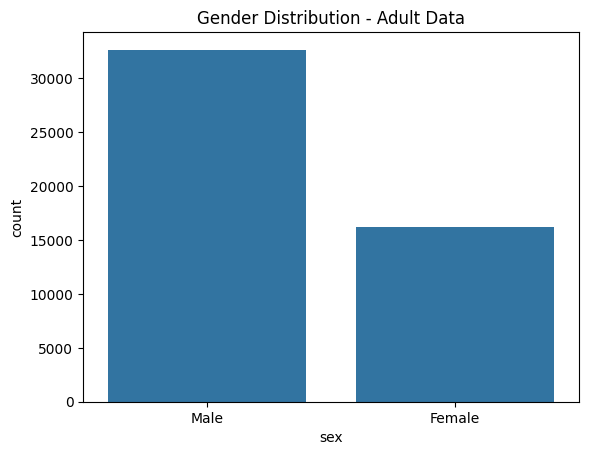

In [89]:
sns.countplot(x='sex', data = adult_data)
plt.title('Gender Distribution - Adult Data')
plt.show()

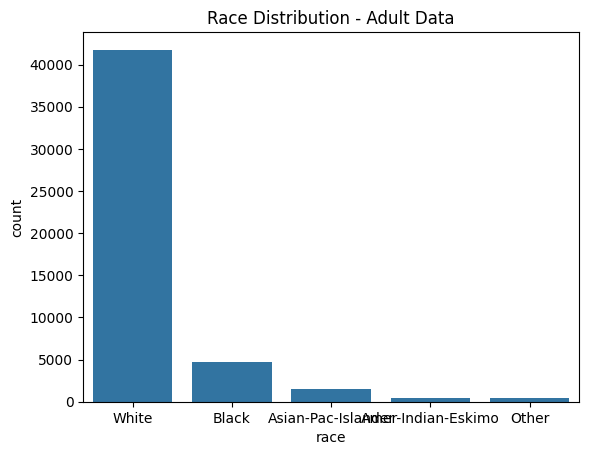

In [90]:
sns.countplot(x='race', data = adult_data)
plt.title('Race Distribution - Adult Data')
plt.show()

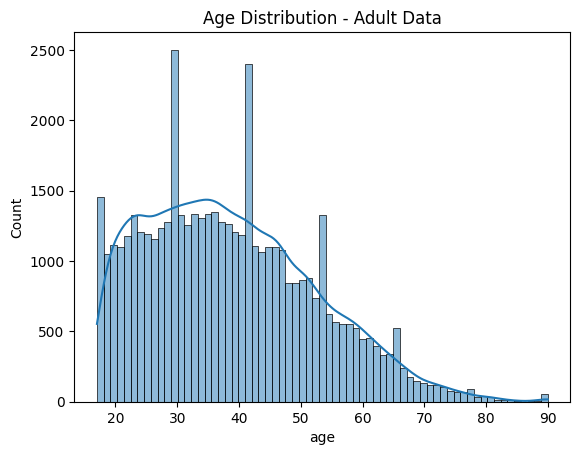

In [91]:
sns.histplot(adult_data['age'], kde=True)
plt.title('Age Distribution - Adult Data')
plt.show()

In [92]:
missing_percentage = adult_data.isnull().mean() * 100
print(missing_percentage)

age               0.000000
workclass         1.971664
fnlwgt            0.000000
education         0.000000
education-num     0.000000
marital-status    0.000000
occupation        1.977806
relationship      0.000000
race              0.000000
sex               0.000000
capital-gain      0.000000
capital-loss      0.000000
hours-per-week    0.000000
native-country    0.560993
income            0.000000
dtype: float64


Total missing value percantage in Adult Data

In [93]:
# Calculate total percentage of missing values in the dataset
Adult_total_missing_percentage = adult_data.isnull().sum().sum() / (adult_data.shape[0] * adult_data.shape[1]) * 100

print(f"Total percentage of missing values: {Adult_total_missing_percentage :.2f}%")

Total percentage of missing values: 0.30%


**Portugal student performance dataset**

In [95]:
student_mat = pd.read_csv(r"C:\Users\zhossai3\Desktop\My code\OT+Fairness\Data\portugal student performance dataset\student-mat.csv",sep=';')
student_por = pd.read_csv(r"C:\Users\zhossai3\Desktop\My code\OT+Fairness\Data\portugal student performance dataset\student-por.csv",sep=';')

In [96]:
missing_values = student_mat.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


In [97]:
missing_values = student_por.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


In [98]:
common_columns = ['school','sex','age','address','famsize','Pstatus','Medu','Fedu','Mjob','Fjob','reason','nursery','internet']

df = pd.merge(student_mat, student_por, on=common_columns, suffixes=('_math_data','_por_data'))

df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel_por_data,freetime_por_data,goout_por_data,Dalc_por_data,Walc_por_data,health_por_data,absences_por_data,G1_por_data,G2_por_data,G3_por_data
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [106]:
df_special_encoding = pd.merge(student_mat, student_por, on=common_columns, suffixes=('_math_data','_por_data'))

In [99]:
df.shape

(382, 53)

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382 entries, 0 to 381
Data columns (total 53 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   school                382 non-null    object
 1   sex                   382 non-null    object
 2   age                   382 non-null    int64 
 3   address               382 non-null    object
 4   famsize               382 non-null    object
 5   Pstatus               382 non-null    object
 6   Medu                  382 non-null    int64 
 7   Fedu                  382 non-null    int64 
 8   Mjob                  382 non-null    object
 9   Fjob                  382 non-null    object
 10  reason                382 non-null    object
 11  guardian_math_data    382 non-null    object
 12  traveltime_math_data  382 non-null    int64 
 13  studytime_math_data   382 non-null    int64 
 14  failures_math_data    382 non-null    int64 
 15  schoolsup_math_data   382 non-null    ob

In [101]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian_math_data', 'traveltime_math_data',
       'studytime_math_data', 'failures_math_data', 'schoolsup_math_data',
       'famsup_math_data', 'paid_math_data', 'activities_math_data', 'nursery',
       'higher_math_data', 'internet', 'romantic_math_data',
       'famrel_math_data', 'freetime_math_data', 'goout_math_data',
       'Dalc_math_data', 'Walc_math_data', 'health_math_data',
       'absences_math_data', 'G1_math_data', 'G2_math_data', 'G3_math_data',
       'guardian_por_data', 'traveltime_por_data', 'studytime_por_data',
       'failures_por_data', 'schoolsup_por_data', 'famsup_por_data',
       'paid_por_data', 'activities_por_data', 'higher_por_data',
       'romantic_por_data', 'famrel_por_data', 'freetime_por_data',
       'goout_por_data', 'Dalc_por_data', 'Walc_por_data', 'health_por_data',
       'absences_por_data', 'G1_por_data', 'G2_por_data', 'G3_p

In [102]:
df['school'] = df['school'].map({'GP': 1, 'MS': 2})
df['sex'] = df['sex'].map({'F': 1, 'M': 2})
df['address'] = df['address'].map({'U': 1, 'R': 2})
df['famsize'] = df['famsize'].map({'GT3': 1, 'LE3': 2})
df['Pstatus'] = df['Pstatus'].map({'A': 1, 'T': 2})
df['Mjob'] = df['Mjob'].map({'health': 1, 'teacher': 2,'services':3,'other':4,'at_home':5})
df['Fjob'] = df['Fjob'].map({'health': 1, 'teacher': 2,'services':3,'other':4,'at_home':5})
df['reason'] = df['reason'].map({'course': 1, 'reputation': 2,'home':3,'other':4})
df['guardian_math_data'] = df['guardian_math_data'].map({'mother': 1, 'father': 2,'other':3})
df['schoolsup_math_data'] = df['schoolsup_math_data'].map({'yes': 1, 'no': 2})
df['famsup_math_data'] = df['famsup_math_data'].map({'yes': 1, 'no': 2})
df['paid_math_data'] = df['paid_math_data'].map({'yes': 1, 'no': 2})
df['activities_math_data'] = df['activities_math_data'].map({'yes': 1, 'no': 2})
df['nursery'] = df['nursery'].map({'yes': 1, 'no': 2})
df['higher_math_data'] = df['higher_math_data'].map({'yes': 1, 'no': 2})
df['romantic_math_data'] = df['romantic_math_data'].map({'yes': 1, 'no': 2})
df['internet'] = df['internet'].map({'yes': 1, 'no': 2})
df['guardian_por_data'] = df['guardian_por_data'].map({'mother': 1, 'father': 2,'other':3})
df['schoolsup_por_data'] = df['schoolsup_por_data'].map({'yes': 1, 'no': 2})
df['famsup_por_data'] = df['famsup_por_data'].map({'yes': 1, 'no': 2})
df['paid_por_data'] = df['paid_por_data'].map({'yes': 1, 'no': 2})
df['activities_por_data'] = df['activities_por_data'].map({'yes': 1, 'no': 2})
df['higher_por_data'] = df['higher_por_data'].map({'yes': 1, 'no': 2})
df['romantic_por_data'] = df['romantic_por_data'].map({'yes': 1, 'no': 2})


In [107]:
df_special_encoding['school'] = df_special_encoding['school'].map({'GP': 1, 'MS': 5})
df_special_encoding['sex'] = df_special_encoding['sex'].map({'F': 10, 'M': 1})
df_special_encoding['address'] = df_special_encoding['address'].map({'U': 16, 'R': 26})
df_special_encoding['famsize'] = df_special_encoding['famsize'].map({'GT3': 31, 'LE3': 41})
df_special_encoding['Pstatus'] = df_special_encoding['Pstatus'].map({'A': 11, 'T': 22})
df_special_encoding['Mjob'] = df_special_encoding['Mjob'].map({'health': 10, 'teacher': 20,'services':30,'other':40,'at_home':50})
df_special_encoding['Fjob'] = df_special_encoding['Fjob'].map({'health': 10, 'teacher': 20,'services':30,'other':40,'at_home':50})
df_special_encoding['reason'] = df_special_encoding['reason'].map({'course': 10, 'reputation': 20,'home':30,'other':40})
df_special_encoding['guardian_math_data'] = df_special_encoding['guardian_math_data'].map({'mother': 15, 'father': 25,'other':35})
df_special_encoding['schoolsup_math_data'] = df_special_encoding['schoolsup_math_data'].map({'yes': 100, 'no': 200})
df_special_encoding['famsup_math_data'] = df_special_encoding['famsup_math_data'].map({'yes': 100, 'no': 200})
df_special_encoding['paid_math_data'] = df_special_encoding['paid_math_data'].map({'yes': 100, 'no': 200})
df_special_encoding['activities_math_data'] = df_special_encoding['activities_math_data'].map({'yes': 100, 'no': 200})
df_special_encoding['nursery'] = df_special_encoding['nursery'].map({'yes': 100, 'no': 200})
df_special_encoding['higher_math_data'] = df_special_encoding['higher_math_data'].map({'yes': 100, 'no': 200})
df_special_encoding['romantic_math_data'] = df_special_encoding['romantic_math_data'].map({'yes': 100, 'no': 200})
df_special_encoding['internet'] = df_special_encoding['internet'].map({'yes': 100, 'no': 200})
df_special_encoding['guardian_por_data'] = df_special_encoding['guardian_por_data'].map({'mother': 15, 'father': 25,'other':35})
df_special_encoding['schoolsup_por_data'] = df_special_encoding['schoolsup_por_data'].map({'yes': 100, 'no': 200})
df_special_encoding['famsup_por_data'] = df_special_encoding['famsup_por_data'].map({'yes': 100, 'no': 200})
df_special_encoding['paid_por_data'] = df_special_encoding['paid_por_data'].map({'yes': 100, 'no': 200})
df_special_encoding['activities_por_data'] = df_special_encoding['activities_por_data'].map({'yes': 100, 'no': 200})
df_special_encoding['higher_por_data'] = df_special_encoding['higher_por_data'].map({'yes': 100, 'no': 200})
df_special_encoding['romantic_por_data'] = df_special_encoding['romantic_por_data'].map({'yes': 100, 'no': 200})

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382 entries, 0 to 381
Data columns (total 53 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   school                382 non-null    int64
 1   sex                   382 non-null    int64
 2   age                   382 non-null    int64
 3   address               382 non-null    int64
 4   famsize               382 non-null    int64
 5   Pstatus               382 non-null    int64
 6   Medu                  382 non-null    int64
 7   Fedu                  382 non-null    int64
 8   Mjob                  382 non-null    int64
 9   Fjob                  382 non-null    int64
 10  reason                382 non-null    int64
 11  guardian_math_data    382 non-null    int64
 12  traveltime_math_data  382 non-null    int64
 13  studytime_math_data   382 non-null    int64
 14  failures_math_data    382 non-null    int64
 15  schoolsup_math_data   382 non-null    int64
 16  famsup_m

In [105]:
df.to_csv(r"C:\Users\zhossai3\Desktop\My code\OT+Fairness\Data\portugal student performance dataset\P_Student_Performance_Data.csv", index=False)

In [108]:
df_special_encoding.to_csv(r"C:\Users\zhossai3\Desktop\My code\OT+Fairness\Data\portugal student performance dataset\P_Student_Performance_Data_special_encoding.csv", index=False)

**Abalone**

In [139]:

# Define column names manually as there is no header in the file
columns = ['Sex', 'Length', 'Diameter', 'Height', 'WholeWeight', 'ShuckedWeight', 'VisceraWeight', 'ShellWeight', 'Rings']

# Read the dataset without a header and assign column names
abalone_data = pd.read_csv(r'C:\Users\zhossai3\Desktop\My code\OT+Fairness\Data\abalone\abalone.data', delimiter=',', header=None, names=columns)

print(abalone_data.head())


  Sex  Length  Diameter  Height  WholeWeight  ShuckedWeight  VisceraWeight  \
0   M   0.455     0.365   0.095       0.5140         0.2245         0.1010   
1   M   0.350     0.265   0.090       0.2255         0.0995         0.0485   
2   F   0.530     0.420   0.135       0.6770         0.2565         0.1415   
3   M   0.440     0.365   0.125       0.5160         0.2155         0.1140   
4   I   0.330     0.255   0.080       0.2050         0.0895         0.0395   

   ShellWeight  Rings  
0        0.150     15  
1        0.070      7  
2        0.210      9  
3        0.155     10  
4        0.055      7  


In [140]:
abalone_data.head(2)

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,7


In [141]:
type(abalone_data)


pandas.core.frame.DataFrame

In [142]:
abalone_data.shape

(4177, 9)

In [143]:
abalone_data['Sex'] = abalone_data['Sex'].map({'M': 1, 'F': 2,'I':3})


In [144]:
abalone_data.head()

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,3,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [145]:
abalone_data.to_csv(r"C:\Users\zhossai3\Desktop\My code\OT+Fairness\Data\abalone\abalone.csv", index=False)

**Heart Failour**

In [151]:
heart_failour = pd.read_csv(r'C:\Users\zhossai3\Desktop\My code\OT+Fairness\Data\Heart Failour\heart.csv')

In [152]:
heart_failour.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [157]:
heart_failour['ST_Slope'].unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [158]:
heart_failour['Sex'] = heart_failour['Sex'].map({'M': 1, 'F':2})
heart_failour['ChestPainType'] = heart_failour['ChestPainType'].map({'ATA': 1, 'NAP':2,'ASY':3,'TA':4})
heart_failour['RestingECG'] = heart_failour['RestingECG'].map({'Normal': 1, 'ST':2,'LVH':3})
heart_failour['ExerciseAngina'] = heart_failour['ExerciseAngina'].map({'N': 1, 'Y':2})
heart_failour['ST_Slope'] = heart_failour['ST_Slope'].map({'Up': 1, 'Flat':2,'Down':3})

In [159]:
heart_failour.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,1,0.0,1,0
1,49,2,2,160,180,0,1,156,1,1.0,2,1
2,37,1,1,130,283,0,2,98,1,0.0,1,0
3,48,2,3,138,214,0,1,108,2,1.5,2,1
4,54,1,2,150,195,0,1,122,1,0.0,1,0


In [160]:
heart_failour.to_csv(r"C:\Users\zhossai3\Desktop\My code\OT+Fairness\Data\Heart Failour\heart_failour.csv", index=False)

In [161]:
heart_failour.shape

(918, 12)

**HSLS**

In [4]:
hsls = pd.read_csv(r'C:\Users\zhossai3\Desktop\My code\OT+Fairness\Data\hsls_17_student_pets_sr_v1_0.csv')

In [5]:
hsls.shape

(23503, 9614)

In [9]:
hsls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23503 entries, 0 to 23502
Columns: 9614 entries, STU_ID to W5W1W2W3W4PSRECORDS200
dtypes: float64(5855), int64(3759)
memory usage: 1.7 GB
